In [ ]:
from scipy.ndimage import gaussian_filter1d
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy.special import j1


In [27]:
def fwhm_along_axis(y, spacing, plot = False):
    # Maximum normalization
    y = gaussian_filter1d(y, sigma=1)
    y_norm = [i/max(y) for i in y]
    # create x values for plot based on the intensity values y considering the spacing
    x = [(i) * spacing for i in range(len(y_norm))]
    y_norm = y_norm-np.max(y_norm)/2
    # find fwhm of plot
    peak = np.max(y_norm)
    half_max = peak / 2

    # Shift s down by half-maximum to find where it crosses zero
    s_shifted = y_norm 

    # Fit a spline to the shifted data
    spline = UnivariateSpline(x, s_shifted, s=0)
    
    if len(spline.roots()) == 1:
        fwhm = 0
    elif len(spline.roots()) == 2:
        r1, r2 = spline.roots()
        fwhm = abs(abs(r1) - abs(r2))
    if plot==True:
        plt.plot(x, s_shifted)
        plt.axvspan(r1, r2, facecolor='g', alpha=0.5)
        plt.xlim([100, 300])
        plt.show()
    # return fwhm
    return [fwhm]

def fwhm_along_axis_2(y, spacing, plot = False):
    # Maximum normalization
    y_norm = [i/max(y) for i in y]
    # create x values for plot based on the intensity values y considering the spacing
    x = [(i) * spacing for i in range(len(y_norm))]

    # find fwhm of plot
    spline = UnivariateSpline(x, y_norm-np.max(y_norm)/2, s=0)
    r1, r2 = spline.roots()
    fwhm = abs(abs(r1) - abs(r2))
    if plot==True:
        plt.plot(x, y_norm-np.max(y_norm)/2)
        plt.axvspan(r1, r2, facecolor='g', alpha=0.5)
        plt.xlim([100, 300])
        plt.show()
    # return fwhm
    return [fwhm]

def airy_disk(x):
    return (2 * j1(x) / x)**2




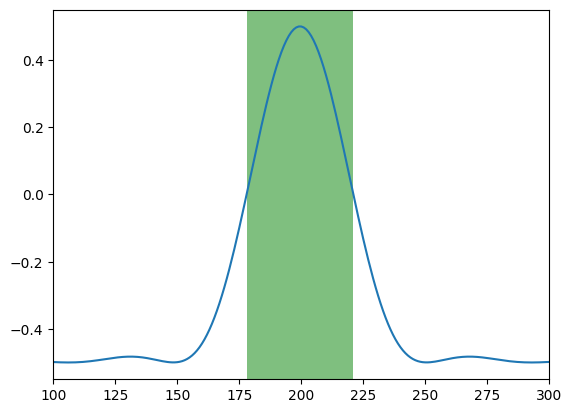

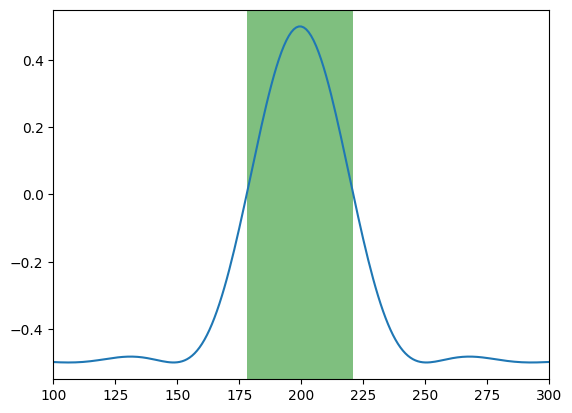

[43.055362834124]
[43.004929247077484]


In [28]:
x = np.linspace(-15, 15, 400)
intensity = airy_disk(x)
fwhm = fwhm_along_axis(intensity, 1, plot=True)
fwhm2 = fwhm_along_axis_2(intensity, 1, plot=True)
print(fwhm)
print(fwhm2)